In [16]:
from warnings import filterwarnings
filterwarnings("ignore")

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
data=pd.read_csv("income.csv")#Data'yı hazırladım
data.drop("Name",axis=1,inplace=True)
data.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


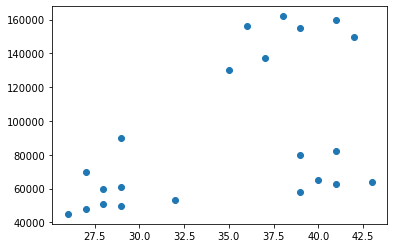

In [19]:
#Data'mızın dağılımını inceledim
plt.scatter(data.Age,data["Income($)"]);

# K-Means

In [20]:
#K-Means Algoritması;
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)#kaç tane küme olacağını söyledim

In [21]:
y_pred=km.fit_predict(data)#Hem uygula hem tahmin et

In [22]:
data["cluster"]=y_pred#Data'da yeni bir sütun oluşturdum ve y_pred değerlerini atadım
data.head()

,Age,Income($),cluster
0,27,70000,0
1,29,90000,0
2,29,61000,2
3,28,60000,2
4,42,150000,1


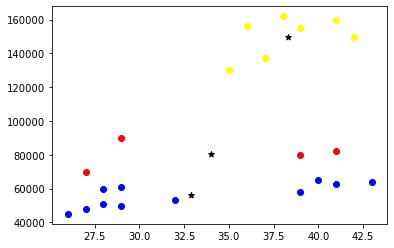

In [23]:
#Oluşan Kümeleri Tablo Halinde Görmek İçin Olşturulan Kodlarım
data1=data[data.cluster==0]
data2=data[data.cluster==1]
data3=data[data.cluster==2]
plt.scatter(data1.Age,data1["Income($)"],color="red")
plt.scatter(data2.Age,data2["Income($)"],color="yellow")
plt.scatter(data3.Age,data3["Income($)"],color="blue")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="black",marker="*",label="center")
plt.legend;

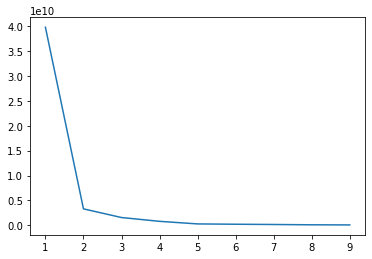

In [24]:
#Elbow Yöntemi:optimum k değerni bulmak için kullandığımız yöntem.Grafikte en büyük kırılma kısmı optimum deger olarak kabul edilir.
cap=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(data)
    cap.append(km.inertia_)

plt.plot(range(1,10),cap);

# Agglomerative

In [27]:
x=data.values

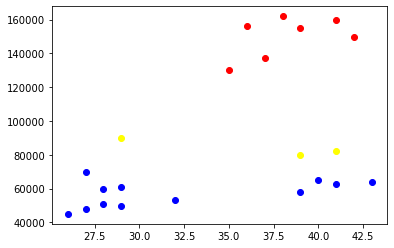

In [32]:
#Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
y_pred=agg.fit_predict(x)

plt.scatter(x[y_pred==0,0],x[y_pred==0,1],color="red")
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],color="blue")
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],color="yellow")

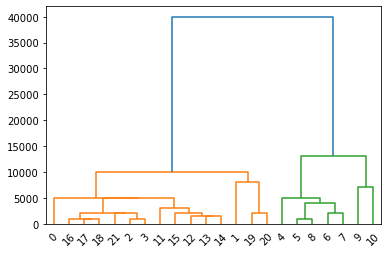

In [36]:
#Dendropgram
import scipy.cluster.hierarchy as sch
tabel=sch.dendrogram(sch.linkage(x))